<a href="https://colab.research.google.com/github/SantiagoAlbarracin/TP3-SOA/blob/main/TP3_Ej1_CPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install validators

In [ ]:
import validators

#@title Ingrese la url de una imagen:

url_imagen = "http://www.fm891.com.ar/wp-content/uploads/2018/04/logo_unlam.png" #@param {type: "string" }

if(url_imagen == "" or not validators.url(url_imagen)):
  raise TypeError("Debe ingresar la url de una imagen.")

!wget {url_imagen} -O imagen

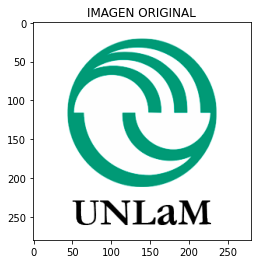

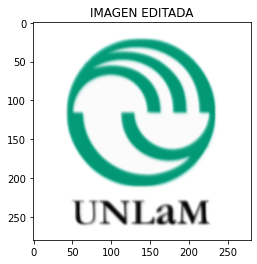

In [ ]:
from datetime import datetime
import numpy as npy
import matplotlib.pyplot as plt
from PIL import Image


def tiene_pixel_izquierda(indice_x, width):
  if indice_x <= 0:
    return False
  return True

def tiene_pixel_derecha(indice_x, width):
  if indice_x >= width:
    return False
  return True

def tiene_pixel_arriba(indice_y, height):
  if indice_y <= 0:
    return False
  return True

def tiene_pixel_abajo(indice_y, height):
  if indice_y >= height:
    return False
  return True

def low_pass_filter(array_imagen_cpu, x, y, imagen_width, imagen_height, suma_pixel, array_imagen_resultado_cpu):
    suma_pixel = (array_imagen_cpu[x][y]) / 9
    if tiene_pixel_arriba(y, imagen_height):
     suma_pixel = ( array_imagen_cpu[x][y-1] ) / 9 + suma_pixel 

    if tiene_pixel_arriba(y, imagen_height) and tiene_pixel_izquierda(x, imagen_width):
     suma_pixel = ( array_imagen_cpu[x-1][y-1] ) / 9 + suma_pixel 

    if tiene_pixel_arriba(y, imagen_height) and tiene_pixel_derecha(x, imagen_width):
     suma_pixel = ( array_imagen_cpu[x+1][y+1] ) / 9 + suma_pixel 

    if tiene_pixel_izquierda(x, imagen_width):
     suma_pixel = ( array_imagen_cpu[x-1][y] ) / 9 + suma_pixel 

    if tiene_pixel_abajo(y, imagen_height):
     suma_pixel = ( array_imagen_cpu[x][y+1] ) / 9 + suma_pixel    

    if tiene_pixel_abajo(y, imagen_height) and tiene_pixel_izquierda(x, imagen_width):
     suma_pixel = ( array_imagen_cpu[x-1][y+1] ) / 9 + suma_pixel 

    if tiene_pixel_abajo(y, imagen_height) and tiene_pixel_derecha(x, imagen_width):
     suma_pixel = ( array_imagen_cpu[x+1][y+1] ) / 9 + suma_pixel 

    if tiene_pixel_derecha(x, imagen_width):
     suma_pixel = ( array_imagen_cpu[x+1][y] ) / 9 + suma_pixel 

    array_imagen_resultado_cpu[x][y] = suma_pixel




#@title Cantidad de iteraciones

iteraciones =  3#@param {type: "number" }

if iteraciones <= 0:
    raise TypeError("Debe ingresar un numero mayor a 0.")

imagen = Image.open('imagen')

imagen_height, imagen_width = imagen.size
cantidad_pixeles = imagen_height * imagen_width


array_imagen_cpu = npy.asarray(imagen)
array_imagen_resultado_cpu = array_imagen_cpu.copy()

plt.figure()
plt.title("IMAGEN ORIGINAL")
imgplot=plt.imshow( array_imagen_cpu )

while iteraciones > 0:
  for y in range( 0, imagen_height - 1 ):
    for x in range( 0, imagen_width - 1 ):
      low_pass_filter(array_imagen_resultado_cpu, x, y, imagen_width, imagen_height, suma_pixel, array_imagen_resultado_cpu)
  iteraciones = iteraciones - 1   


plt.figure()
plt.title("IMAGEN EDITADA")
imgplot=plt.imshow( array_imagen_resultado_cpu )





